#Directory

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis

/content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis


#Libraries

In [2]:
#install library
!pip install lifelines

     |████████████████████████████████| 358kB 4.3MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4050 sha256=2090066f0508599d80b55cbcc5b7b395ed8bf1e4642fd1c62c8706ede9c2a0c8
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [3]:
#import libraries
import pandas as pd

# data

In [4]:
#import dataset
dataset = pd.read_csv("lung.csv")
dataset.head()                                   

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [5]:
#transforming dependent variable
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head

<bound method NDFrame.head of      inst  time  status  age  ...  ph.karno  pat.karno  meal.cal  wt.loss
0     3.0   306       1   74  ...      90.0      100.0    1175.0      NaN
1     3.0   455       1   68  ...      90.0       90.0    1225.0     15.0
2     3.0  1010       0   56  ...      90.0       90.0       NaN     15.0
3     5.0   210       1   57  ...      90.0       60.0    1150.0     11.0
4     1.0   883       1   60  ...     100.0       90.0       NaN      0.0
..    ...   ...     ...  ...  ...       ...        ...       ...      ...
223   1.0   188       0   77  ...      80.0       60.0       NaN      3.0
224  13.0   191       0   39  ...      90.0       90.0    2350.0     -5.0
225  32.0   105       0   75  ...      60.0       70.0    1025.0      5.0
226   6.0   174       0   66  ...      90.0      100.0    1075.0      1.0
227  22.0   177       0   58  ...      80.0       90.0    1060.0      0.0

[228 rows x 10 columns]>

#Kaplan Meier Estimator

In [6]:
#KME
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = dataset.time,
          event_observed = dataset.status)
model.event_table.head(4)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224


In [7]:
#calculate for specific events
day_5 = model.event_table.iloc[1, :]
print(day_5)
surv_5 = 1 * (1- day_5.observed / day_5.at_risk)
print(surv_5)
day_11 = model.event_table.iloc[2, :]
surv_11 = surv_5 * (1 - day_11.observed / day_11.at_risk)
print(surv_11)

removed       1
observed      1
censored      0
entrance      0
at_risk     228
Name: 5.0, dtype: int64
0.9956140350877193
0.9824561403508771


In [8]:
#Approximation
surv_11_approximate = (day_11.at_risk - day_11.observed) / day_11.at_risk
surv_11_approximate

0.986784140969163

#Visualization

Text(0, 0.5, 'Survival')

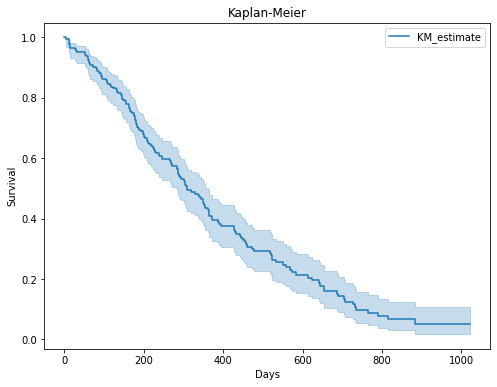

In [9]:
#plotting survival curve
import matplotlib.pyplot as plt
model.plot(figsize = (8,6))
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

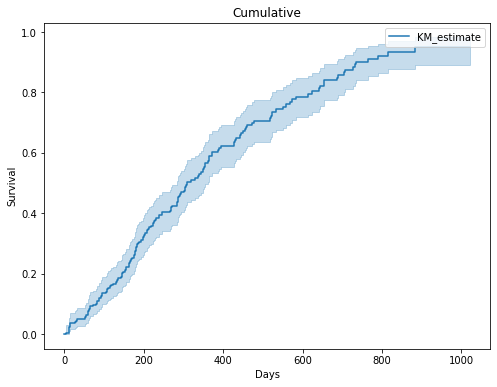

In [10]:
#plotting survival curve
import matplotlib.pyplot as plt
model.plot_cumulative_density(figsize = (8,6))
plt.title("Cumulative")
plt.xlabel("Days")
plt.ylabel("Survival")

#Male vs Female

In [11]:
#create DF with males and Females
male = dataset.query("sex == 1")
female = dataset.query("sex == 2")
female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
11,16.0,654,1,68,2,2.0,70.0,70.0,NaN,23.0
12,11.0,728,1,68,2,1.0,90.0,90.0,NaN,5.0
18,1.0,61,1,56,2,2.0,60.0,60.0,238.0,10.0


In [12]:
#Kaplan - Meier per gender
#KME
model_males = KaplanMeierFitter()
model_males.fit(durations = male.time,
                event_observed = male.status)
model_females = KaplanMeierFitter()
model_females.fit(durations = female.time,
                  event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

Text(0, 0.5, 'Survival')

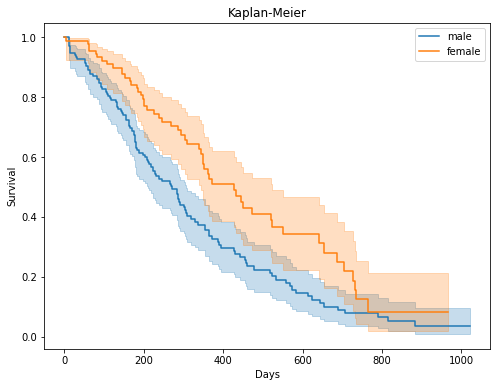

In [13]:
#plotting survival curve
import matplotlib.pyplot as plt
model_males.plot(figsize = (8,6), label = "male")
model_females.plot(label = "female")
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [14]:
#Log Rank test
from lifelines.statistics import logrank_test
logrank_test(durations_A = male.time,
             durations_B = female.time,
             event_observed_A = male.status,
             event_observed_B = female.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57